In [1]:
import pandas as pd

df1 = pd.read_json('reviews_Movies_and_TV.json', lines = True)

print(df1.head())

       reviewerID        asin        reviewerName helpful  \
0  A3R5OBKS7OM2IR  0000143502  Rebecca L. Johnson  [0, 0]   
1  A3R5OBKS7OM2IR  0000143529  Rebecca L. Johnson  [0, 0]   
2   AH3QC2PC1VTGP  0000143561     Great Home Cook  [2, 4]   
3  A3LKP6WPMP9UKX  0000143588     Anna V. Carroll  [9, 9]   
4   AVIY68KEPQ5ZD  0000143588  Rebecca Millington  [1, 4]   

                                          reviewText  overall  \
0  This has some great tips as always and is help...        5   
1  This is a great pastry guide.  I love how Alto...        5   
2  I have to admit that I am a fan of Giada's coo...        2   
3  I bought these two volumes new and spent over ...        5   
4  I am very pleased with the dvd only wish i cou...        5   

                                   summary  unixReviewTime   reviewTime  
0                      Alton... nough said      1358380800  01 17, 2013  
1                              Ah Alton...      1380672000   10 2, 2013  
2                   

In [2]:
df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3R5OBKS7OM2IR,0000143502,Rebecca L. Johnson,"[0, 0]",This has some great tips as always and is help...,5,Alton... nough said,1358380800,"01 17, 2013"
1,A3R5OBKS7OM2IR,0000143529,Rebecca L. Johnson,"[0, 0]",This is a great pastry guide. I love how Alto...,5,Ah Alton...,1380672000,"10 2, 2013"
2,AH3QC2PC1VTGP,0000143561,Great Home Cook,"[2, 4]",I have to admit that I am a fan of Giada's coo...,2,Don't waste your money,1216252800,"07 17, 2008"
3,A3LKP6WPMP9UKX,0000143588,Anna V. Carroll,"[9, 9]",I bought these two volumes new and spent over ...,5,VOLUME 1 & VOLUME 2-BETTER THAN THERAPY,1236902400,"03 13, 2009"
4,AVIY68KEPQ5ZD,0000143588,Rebecca Millington,"[1, 4]",I am very pleased with the dvd only wish i cou...,5,Barefoot Contesst Vol 2,1232236800,"01 18, 2009"


In [3]:
df =df1

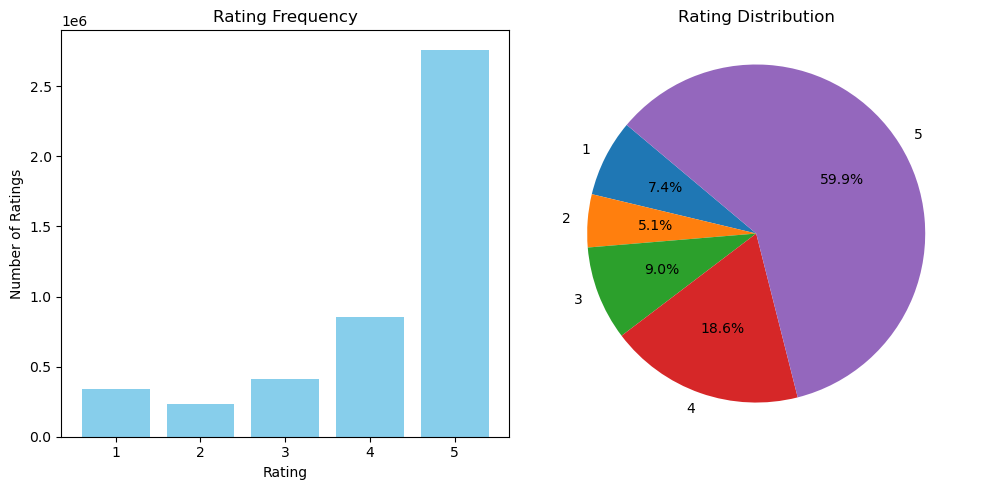

In [4]:
import matplotlib.pyplot as plt
rating_freq = df['overall'].value_counts().sort_index()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plotting the bar chart
axs[0].bar(rating_freq.index, rating_freq.values, color='skyblue', align='center')
axs[0].set_title('Rating Frequency')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Number of Ratings')
axs[0].set_xticks(range(1, 6))  # Ratings from 1 to 5

# Plotting the pie chart
axs[1].pie(rating_freq, labels=rating_freq.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Rating Distribution')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [5]:
rating_freq

overall
1     339544
2     233221
3     415369
4     857505
5    2761408
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4607047 entries, 0 to 4607046
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   reviewerID      object
 1   asin            object
 2   reviewerName    object
 3   helpful         object
 4   reviewText      object
 5   overall         int64 
 6   summary         object
 7   unixReviewTime  int64 
 8   reviewTime      object
dtypes: int64(2), object(7)
memory usage: 316.3+ MB


In [7]:

unique_product_counts = df['asin'].value_counts()

print("Unique products and their interated counts:")
print(unique_product_counts)


Unique products and their interated counts:
asin
1608838137    11906
B003EYVXV4    10223
B00FZM8Z7I    10137
B004NSUXHU    10054
B0038M2APA     9458
              ...  
B000R9AKOU        1
B000R92LTM        1
B000R91SJQ        1
B000R91ANK        1
B00LVGP8EA        1
Name: count, Length: 200941, dtype: int64


In [8]:
# Extracting helpful_votes and total_votes from the 'helpful' column
df['helpful_votes'] = df['helpful'].apply(lambda x: int(str(x)[1:-1].split(',')[0].strip()))
df['total_votes'] = df['helpful'].apply(lambda x: int(str(x)[1:-1].split(',')[1].strip()))

# Calculate the helpfulness ratio (X/Y), handling the case where total votes are 0
df['helpfulness_ratio'] = df.apply(lambda row: row['helpful_votes'] / row['total_votes'] if row['total_votes'] > 0 else 0, axis=1)

# Drop unnecessary columns
columns_to_drop = ['reviewerName', 'helpful', 'reviewText', 'summary', 'unixReviewTime', 'reviewTime']
df.drop(columns=columns_to_drop, inplace=True)

# Display the preprocessed DataFrame
print(df)

             reviewerID        asin  overall  helpful_votes  total_votes  \
0        A3R5OBKS7OM2IR  0000143502        5              0            0   
1        A3R5OBKS7OM2IR  0000143529        5              0            0   
2         AH3QC2PC1VTGP  0000143561        2              2            4   
3        A3LKP6WPMP9UKX  0000143588        5              9            9   
4         AVIY68KEPQ5ZD  0000143588        5              1            4   
...                 ...         ...      ...            ...          ...   
4607042   AHCV1RTGY3PJ8  B00LT1JHLW        5              1           25   
4607043  A2RWCXDMANY0LW  B00LT1JHLW        5              0            4   
4607044  A3V9PIFRME2XCW  B00LT1JHLW        5              2           10   
4607045  A3ROPC55BE2OM9  B00LT1JHLW        5             11           23   
4607046  A2ARBNMH5Q5YM1  B00LVGP8EA        5              1            2   

         helpfulness_ratio  
0                 0.000000  
1                 0.000000  


In [9]:
asin_mapping = dict(zip(range(len(df['asin'].unique())), df['asin'].unique()))

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['reviewerID'] = label_encoder.fit_transform(df['reviewerID'])
df['asin_t'] = label_encoder.fit_transform(df['asin'])

C:\Users\tutun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tutun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tutun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


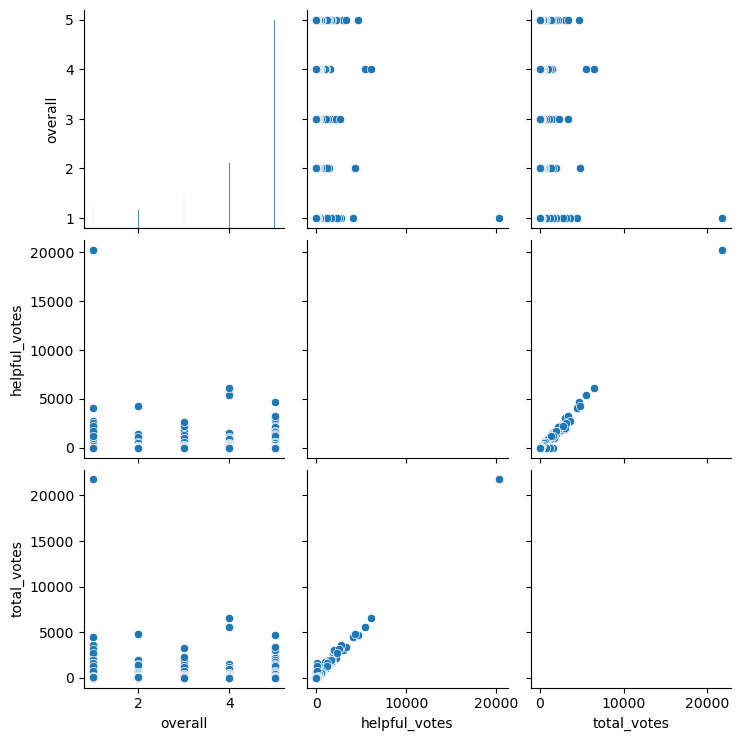

In [11]:
import seaborn as sns
sns.pairplot(df[['overall', 'helpful_votes', 'total_votes']])
plt.show()

In [12]:
df.head()

,reviewerID,asin,overall,helpful_votes,total_votes,helpfulness_ratio,asin_t
0,1520337,0000143502,5,0,0,0.00,0
1,1520337,0000143529,5,0,0,0.00,1
2,1799418,0000143561,2,2,4,0.50,2
3,1434996,0000143588,5,9,9,1.00,3
4,2020251,0000143588,5,1,4,0.25,3


In [13]:

df.to_csv('pretrained_viewer_data.csv', index=False)
